This document is aimed as a tutorial to explore the physics of the protostellar collapse using the RAMSES code. If you have never used RAMSES, you can take a look at the quick start guide. Otherwise you can proceed directly with this tutorial

In [5]:
from IPython.display import Image

# Dense core collapse with RAMSES

Star formation is a complex problem which invokes a huge range of scales, physical processes (MHD, radiation, self-gravity etc.) and components (gas, dust, photons etc.). In this project, we are going to investigate a particular problem of star formation, which is the gravitational collapse of dense cores (or prestellar cores) which occurs when they reach their Jeans mass. This process is at the origin of star formation and also, around the star and through angular momentum conservation, protostellar disk formation. 


## Collapse setup

As often when studying the ISM, the question of initial conditions is tricky. In the collapse can we should, in principle start from very large scales (arguably galactic scales) and zoom-in up to dense core scales. While some groups are investigating this problem, this is of course not possible for a practical session. Therefore we are going to use a much simple set of initial conditions : the Boss and Bodenheimer setup. 

In this setup, we consider an isolated spherical dense core of mass M, radius R and temperature T. Generally, we fix the mass and temperature and compute the radius to ensure that the cloud is gravitationally collapsing. Often, we fix the radius using the thermal-to-gravitational energy ratio $\alpha$ (or Virial parameter).

$\alpha = \frac{5}{2} \frac{R}{GM} \frac{k_B T}{\mu_g m_H}$

where $G$ and $k_B$ are the gravitational and Boltzmann constants and $\mu_g=2.31$ is the mean molecular weight. With the RAMSES setup, we go for a simpler option. Where R is one fourth of the lenght of the box size.

You can also add some solid body rotation $\Omega$, assuming a certain value for rotational-to-gravitational energy ratio $\beta$. To initialize $\Omega$, we $\beta$ such as 

$\beta =\frac{R^3 \Omega^2}{3 \mathcal{G} M_{\odot} }$

Typically, we set it to a few percent, which is in lines with observations of prestellar cores.


### Equation of state 

The radiative transfer during the collapse is, in principle, a quite complex business and requires to use a RT solver which is able to treat properly infrared radiation. We often circumvent the issue by assuming a EOS as follows

$P = \rho c_{s,0}^2 \left[1 + \left(\frac{\rho}{\rho_{\mathrm{ad}}}\right)^{\gamma-1}\right]$


This equation allows to recover the two regimes of the first collapse, namely the isothermal phase at low density when radiation can escape freely from the core in the IR and the adiabatic contraction of the first Larson core at high density ($\rho>\rho_{\mathrm{ad}}$). 

## A quick first collapse model : exploration of the first Larson core 

Let's now run a first collapse calculation with the aim of writing a python pipeline to analyse it. The goal of this exercise is to write a scripts that analyses every output of the simulations. For each snapshot we will compute


1. a slice of the density and temperature in the x, y and z directions


2. a density PDF to learn how to handle the raw data that are read by OSYRIS.


To perform this analysis we will use the documentation of Osyris (available at https://osyris.readthedocs.io/en/stable/).


To run our calculation we are going to need to use the coeur patch.  It is located at 


../patch/mhd/coeur


Note that there is also a version of this patch in the hydro folder but we are going to compile the code with the MHD solver (and eventually set B=0 when we want to run hydro simulations). To compile with the coeur patch go back to the bin folder, clean it with the command

make clean


And now we compile it like that 



make NDIM=3 PATCH=../patch/mhd/coeur SOLVER=mhd NDIM=3

You have now a ramses3d executable that can be used to run collapse calculations (using the correct namelist).


Now we would like to use ramses mpi parallelisation in order to run it faster. We therefore need to compile the code with the following command (and openmpi installed on your machine)


 make clean
 make NDIM=3 PATCH=../patch/mhd/coeur SOLVER=mhd NDIM=3 MPI=1



Now copy the executable and the namelist file into  collapse-run directory when you want to run the simulation. Once it's done you can go in this directory. Let's assume you want to run the code with 4 CPUs, then the command is simply 


mpirun -np 4 ramses3d barotrop.nml



Note that you can keep the terminal information in a log file (e.g. collapse.log) with the command 



mpirun -np 4 ramses3d barotrop.nml > collapse.log

<font color='green'> You can find the barotrop.nml in the nml folder of the tutorial</font>


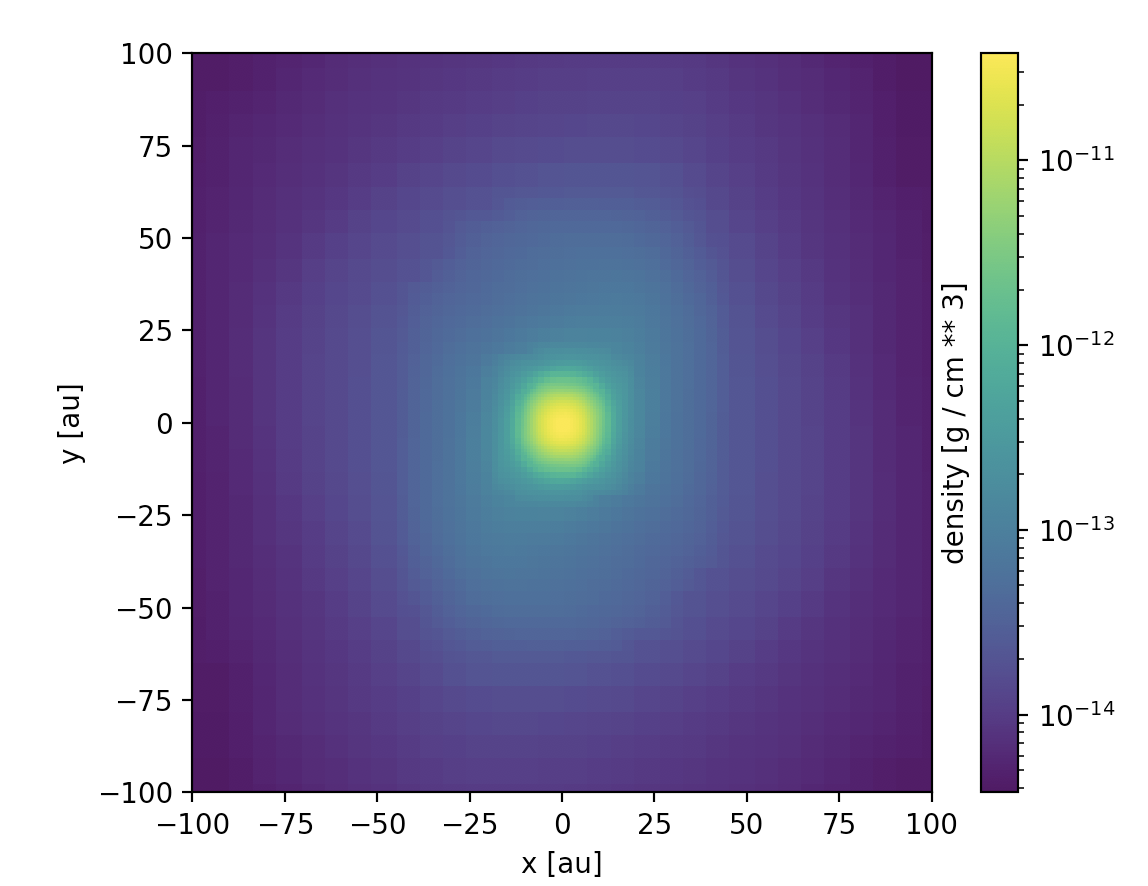

In [8]:
Image("figures/slice_20.png")

Figure 1 Exemple of 200 au x 200 au slice in the z direction of a collapse without rotation obtained with OSYRIS. 

### After running your model

We can now start to extract structures (such as the first core) to analyse the model. When the density reaches values higher than $10^{-11}~$g cm$^{-3}$, fragments called first Larson cores are forming. We propose to measure the mass as a function of time. This will require to filter the data with masks (using the criterion $\rho>10^{-11}~$g cm$^{-3}$) and to perform the mass measurement on these filtered data.

## Adding rotation 

Let's now add rotation. The solid body rotation rate is controlled with the beta\_dense\_core parameter. Typically, you can choose a value between 0.01 and 0.05 to stay in the observed range of dense core. You should also set delta\_rho to 0.1. This sets a m=2 density perturbation of 10\% amplitude which prevent the formation of a spurious m=4 mode which could unfortunately form as a consequence of the cartesian grid. 

 

 Lets now play with this parameter and see its impact on the fragmentation and disk formation during the collapse. For that, we need to push a bit the calculation, as fragmentation will not happen immediately. We will need to run the simulation at least up to output 15 (more ore less a few depending on your choice of initial conditions). If time is limited, we can distribute some outputs to analyse them once you have run the first timesteps yourself. 


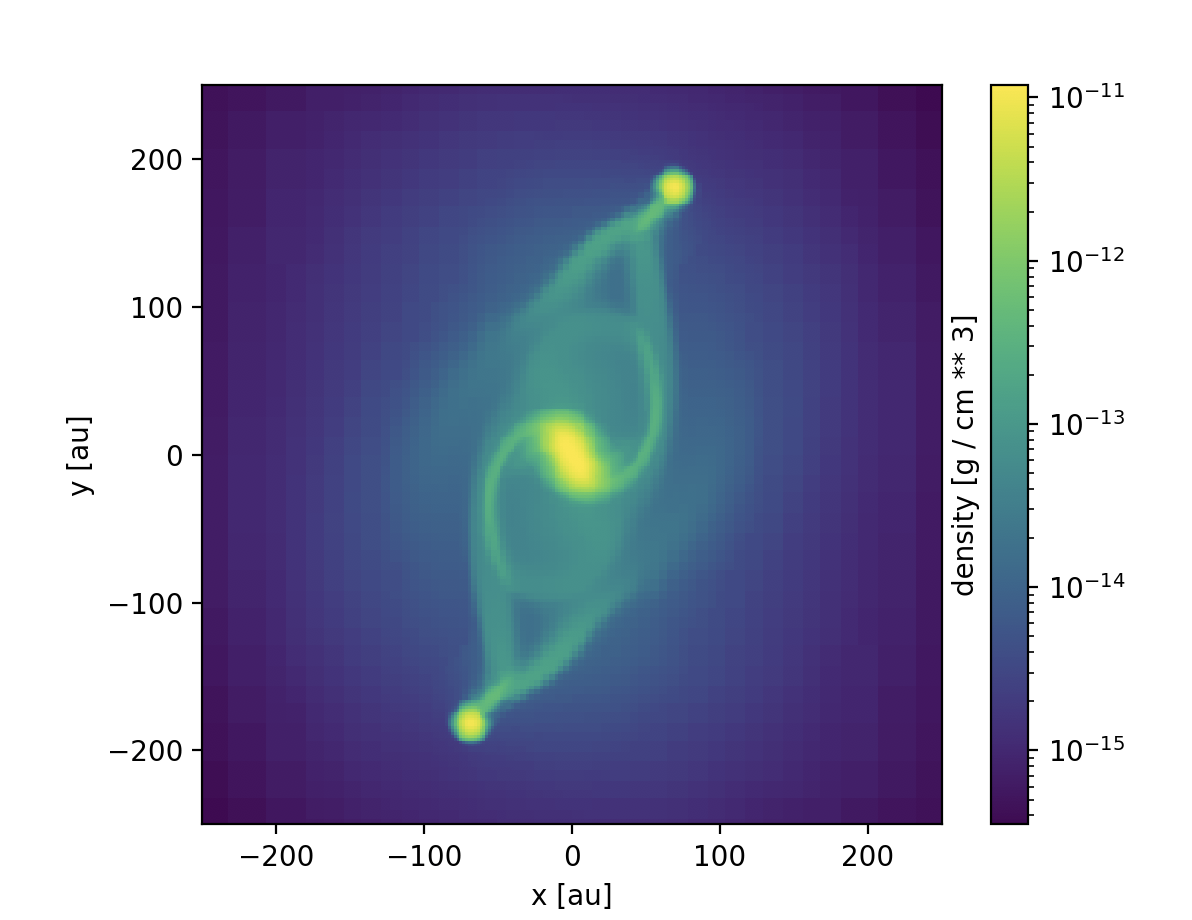

In [9]:
Image("figures/frag.png")

Figure 2 Slice of 500 au x 500 au in the z direction obtained with OSYRIS for the snapshot 17 centered at the position
of the density maximum. We clearly see that the core has fragmented into three objects.

 We can count the fragment, look at their separation as a function of time and their mass distribution.

 It is also interesting to look at the disk properties, when a disk is formed. For that we need to have some seletion criterion for the disk. Typically, we consider that a disk is a dense and rotationally supported structure. To extract it, we can use the following criterion. The disk material must be 

### After running your models

1. Dense enough.


2. Supported by rotation


3.  Not thermally supported (this is the first core).


Once you have extracted the disk, try to measure its size and mass as a function of the time.

## Magnetic fields

Dense core are actually magnetised, and the magnetic field, although likely sub-critical is likely to be dynamically relevant. Usually, we set the magnetic field strength according to the mass-to-flux ratio $\mu$ (in units of critical mass-to-flux ratio). When $\mu>1$, the collapse can happen, typically $1<\mu<10$ in dense cores, so lets explore here this range. By setting the parameter crit in the namelist, we are setting $\frac{1}{\mu}$. 


### After running your models

Lets look again at the disk. Normally, you should see that for mass-to-flux ratio of the order of a few, the disk is gone. We can observe a dense thin structure around the first core but this is not a disk, this is a pseudo-disk. The pseudo-disk is a consequence of the pinching of the magnetic field line that compress the matter in the equatorial plane but it is not a supported structure (it is collapsing). 




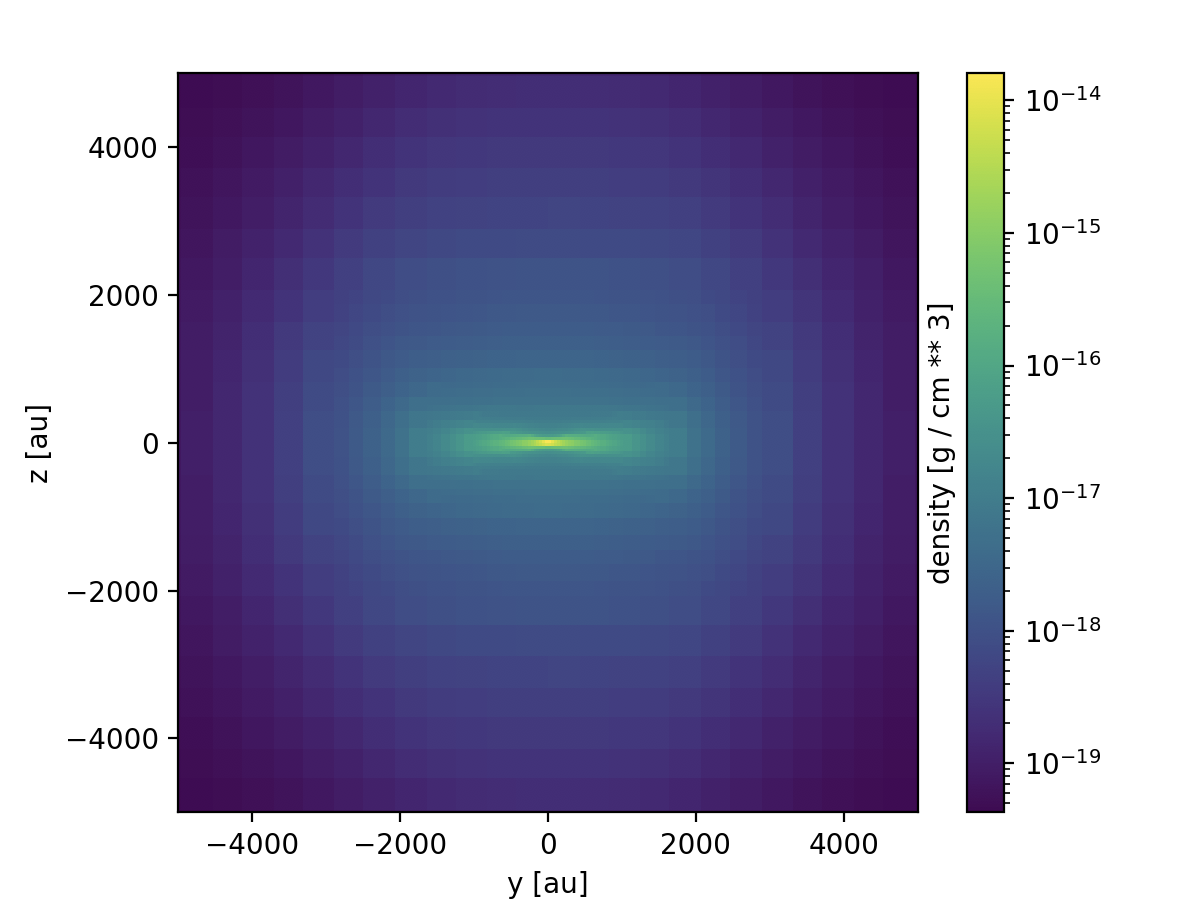

In [12]:
Image("figures/pseudo_disk.png")

Figure 3 Slice of 10000 au x 10000 au in the x direction obtained with OSYRIS that shows the pseudo-disk for a collapse model with crit=0.3.


Why is the disk gone ? During the collapse, the twisting of the magnetic field lines generates an intense magnetic braking which suppresses rotation. This so-called magnetic braking catastrophe is a classic problem in the disk formation community. You can take a look at the magnetic field lines to see both the pinching and twisting on the field. 



This problem is now solved for the most part by including non-ideal MHD processes that decouple the gas from the magnetic field but are unfortunately not yet implemented in the public version of ramses. Two other potential solutions to recover the disks have also been brought-up by the community : a misalignment between the magnetic field and the rotation axis and turbulence. 

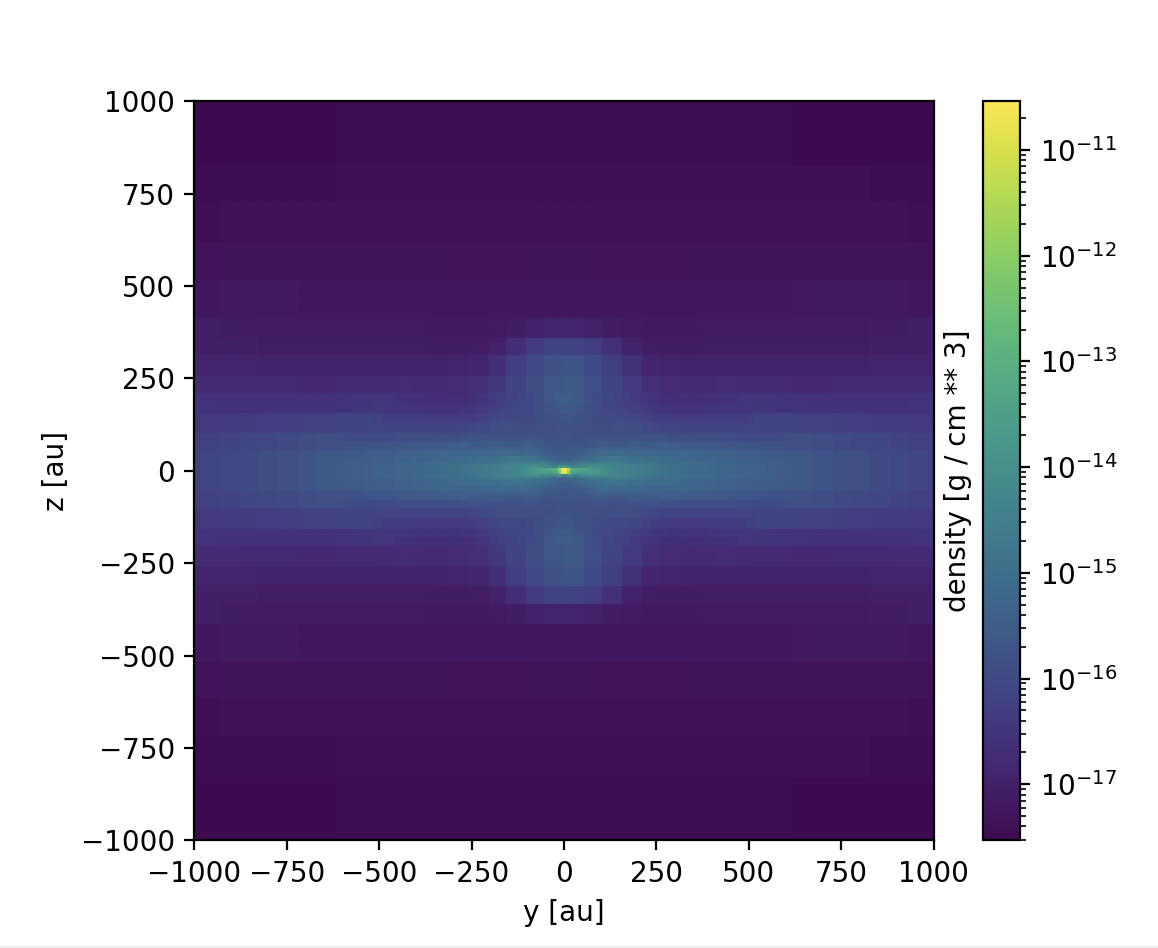

In [13]:
Image("figures/mhd.png")

Figure 4 Slice of 1000 au x 1000 au in the x direction obtained with OSYRIS that shows a MHD outflow for a collapse model with crit=0.3 as it propagates in the z direction.

Quite interestingly, magnetised models also produce protostellar outflows. This is good since these outflows are observed. You can look at them with edge-one slices and try to see how they depend on the initial magnetic field strength.

# Misaligned magnetic fields

Let us now pay attention to the case when the axis of rotation and of the magnetic field are misaligned. This is not implemented in the coeur setup of RAMSES, so you will need to copy the patch coeur_misaligned in the patch/mhd folder of ramses and recompile the code with the commands 

make clean


make NDIM=3 PATCH=../patch/mhd/coeur_misaligned SOLVER=mhd NDIM=3


<font color='red'> That's how far I went up to now. I'd like to also add the turbulent ICs </font>


## Other parameters of the namelist 

You can also try to look at the impact of some purely numerical parameters.

### Resolution

In collapse calculations, the resolution is set by at least 2 parameters. We have jeans\_refine (20*10 by default) which sets the number of points per Jeans length. The first number indicated how many subsequent levels of refinement should be concerned by the value and the second number sets the number of points per Jeans length you want to have. As a matter of example 10*8 means we want 8 points per Jeans length for the 10 first levels (starting from levelmin) of refinement while 4*8,4*16 means the four first levels will have 8 points per Jeans length while the 4 following will have 16 points. Note that at least 8 points is generally required to avoid artificial fragmentation so you should avoid going below this value. On the other hand, having too much points per Jeans length is computationally intensive. In this tutorial, we propose to stick with 10 points. The second parameter, which you will want to vary here is levelmax.

### Solver and slope limiters 

Several Riemann solvers are available for MHD simulations. They can be changed by the parameter riemann (available
values : llf, hll, hlld). By default, we used the llf solver which is the most diffusive one (and also most stable). You can
play with this choice to see how it affects the dynamics of the collapse. Similarly, you can change the slope limiter used
for the reconstruction by changing the value slope type (1=minmod